In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/AI, Data Science & Analytics/raw_sales2.csv')

In [4]:
data.head(5)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
def find_anomalies(data):
  anomalies = []
  rndom_data_std = statistics.stdev(data)
  random_data_mean = statistics.mean(data)
  #three times standard deviation
  anomaly_cut_off = rndom_data_std * 3
  lower_limit = random_data_mean - anomaly_cut_off
  upper_limit = random_data_mean + anomaly_cut_off
  for outlier in data:
    if outlier > upper_limit or outlier < lower_limit:
      anomalies.append(outlier)
    return anomalies

In [7]:
data.price

,price
0,525000
1,290000
2,328000
3,380000
4,310000
...,...
29575,500000
29576,560000
29577,464950
29578,589000


In [8]:
list1 = find_anomalies(data['price'])

In [9]:
len(list1)
len(data)

29580

In [10]:
data.price.skew()

np.float64(4.312009366902366)

In [13]:
import seaborn as sns

<Axes: xlabel='price', ylabel='Density'>

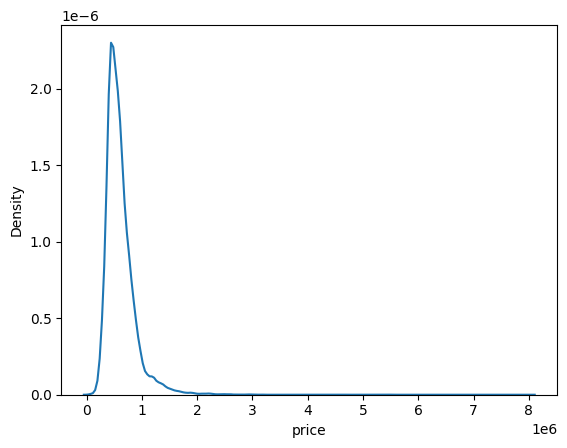

In [14]:
sns.kdeplot(data.price)

In [15]:
data['pricetransformed'] = np.log(data.price)

In [16]:
data.pricetransformed.skew()

np.float64(0.4731646269984763)

In [17]:
list2 = find_anomalies(data['pricetransformed'])

In [18]:
len(list2)
len(data)

29580

<Axes: xlabel='pricetransformed', ylabel='Density'>

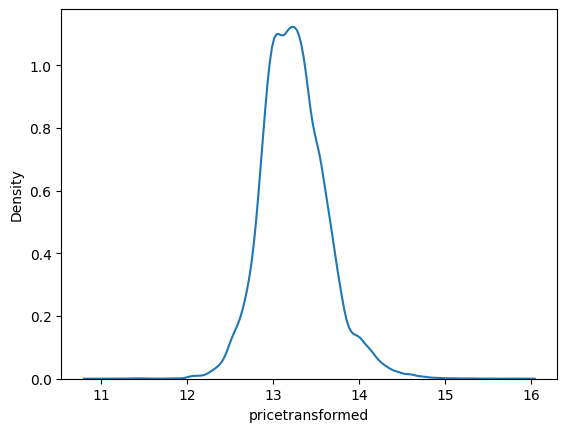

In [20]:
sns.kdeplot(data.pricetransformed)

In [22]:
data['doublepricetransformed'] = np.log(data.pricetransformed)

In [23]:
data.pricetransformed.skew()

np.float64(0.4731646269984763)

In [25]:
list2 = find_anomalies(data.doublepricetransformed)

In [27]:
len(list2)
len(data)

29580

<Axes: xlabel='doublepricetransformed', ylabel='Density'>

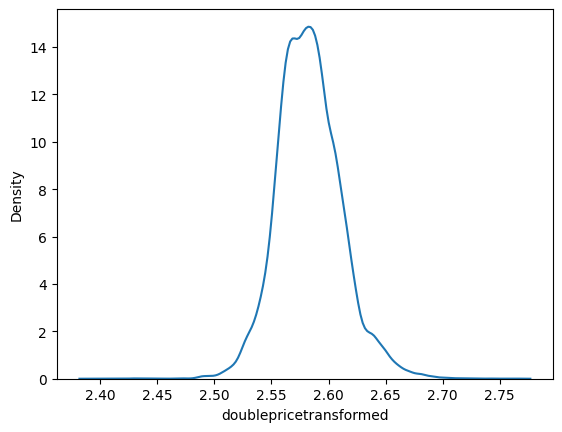

In [28]:
sns.kdeplot(data.doublepricetransformed)

BOX  Plots

<Axes: >

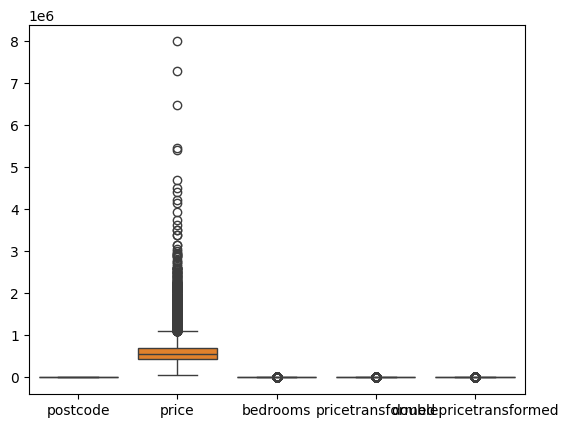

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data)

In [33]:
import pandas as pd
df = pd.DataFrame(data)

In [35]:
df

,datesold,postcode,price,propertyType,bedrooms,pricetransformed,doublepricetransformed
0,2007-02-07 00:00:00,2607,525000,house,4,13.171154,2.578029
1,2007-02-27 00:00:00,2906,290000,house,3,12.577636,2.531920
2,2007-03-07 00:00:00,2905,328000,house,3,12.700769,2.541663
3,2007-03-09 00:00:00,2905,380000,house,4,12.847927,2.553182
4,2007-03-21 00:00:00,2906,310000,house,3,12.644328,2.537209
...,...,...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3,13.122363,2.574318
29576,2019-07-25 00:00:00,2612,560000,unit,2,13.235692,2.582917
29577,2019-07-26 00:00:00,2912,464950,unit,2,13.049685,2.568764
29578,2019-07-26 00:00:00,2601,589000,unit,2,13.286181,2.586725


from matplotlib import pyplot as plt
df['postcode'].plot(kind='hist', bins=20, title='postcode')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['bedrooms'].plot(kind='hist', bins=20, title='bedrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['pricetransformed'].plot(kind='hist', bins=20, title='pricetransformed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('propertyType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='postcode', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='price', y='bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='bedrooms', y='pricetransformed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='pricetransformed', y='doublepricetransformed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datesold']
  ys = series['postcode']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datesold', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('propertyType')):
  _plot_series(series, series_name, i)
  fig.legend(title='propertyType', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datesold')
_ = plt.ylabel('postcode')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datesold']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datesold', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('propertyType')):
  _plot_series(series, series_name, i)
  fig.legend(title='propertyType', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datesold')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datesold']
  ys = series['bedrooms']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datesold', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('propertyType')):
  _plot_series(series, series_name, i)
  fig.legend(title='propertyType', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datesold')
_ = plt.ylabel('bedrooms')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datesold']
  ys = series['pricetransformed']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datesold', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('propertyType')):
  _plot_series(series, series_name, i)
  fig.legend(title='propertyType', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datesold')
_ = plt.ylabel('pricetransformed')

from matplotlib import pyplot as plt
df['postcode'].plot(kind='line', figsize=(8, 4), title='postcode')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['bedrooms'].plot(kind='line', figsize=(8, 4), title='bedrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['pricetransformed'].plot(kind='line', figsize=(8, 4), title='pricetransformed')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['propertyType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='postcode', y='propertyType', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['propertyType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='price', y='propertyType', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['propertyType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='bedrooms', y='propertyType', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['propertyType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='pricetransformed', y='propertyType', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [36]:
df.describe()

,postcode,price,bedrooms,pricetransformed,doublepricetransformed
count,29580.000000,2.958000e+04,29580.000000,29580.000000,29580.000000
mean,2730.249730,6.097363e+05,3.250169,13.244695,2.583199
std,146.717292,2.817079e+05,0.951275,0.375214,0.028183
min,2600.000000,5.650000e+04,0.000000,10.941996,2.392608
25%,2607.000000,4.400000e+05,3.000000,12.994530,2.564529
50%,2615.000000,5.500000e+05,3.000000,13.217674,2.581555
75%,2905.000000,7.050000e+05,4.000000,13.465953,2.600165
max,2914.000000,8.000000e+06,5.000000,15.894952,2.766002
